In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib inline 
import seaborn as sns
import datetime
import scipy.stats as stats
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/ess/home/hr.choi/hr.choi/US_2020.csv', encoding='windows-1252')
df

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,30-12-20,908,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
3308,30-12-20,909,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
3309,30-12-20,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188
3310,30-12-20,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750


In [37]:
print(df.shape)
print('row: ', df.shape[0], ', columns: ', df.shape[1])

(3312, 19)
row:  3312 , columns:  19


In [38]:
#US_Abbreviation

us_state_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}



In [39]:
df['State'] = df['State'].map(us_state_abbrev).fillna('State')
df

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,OH,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,CA,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,WI,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,TX,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,TX,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,30-12-20,908,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,NY,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
3308,30-12-20,909,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,NY,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
3309,30-12-20,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,CA,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188
3310,30-12-20,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,CA,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750


There are {47} in database and the top 10 states are {'CA, NY, TX, WA, PA, IL, OH, FL, NC, TN'}
The top 10 countries proportion is  71.5 out of all countries.


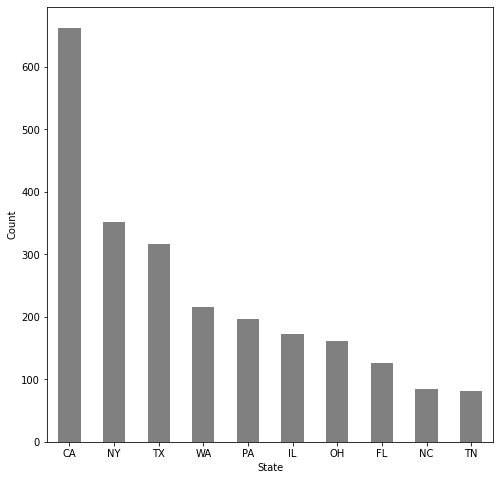

In [103]:
#states = df["State"].nunique()
c1 = df.groupby('State')['Row ID'].nunique().sort_values(ascending = False)
c2 = c1.head(10)
c3 = c2.index

#전체에서 top10의 비율 계산 
proportion = round((c2.sum() / df.shape[0])*100, 1 )
#print(proportion)

#PLOT 으로 시각화
plt.figure(figsize=(8,8))
plt.ylabel('Count')
plt.xlabel('State')
c2.plot(kind="bar", rot=0, color = 'grey')

#정리 
#print('There are', states, 'in database and the top 10 states are', {', '.join(c3)})
print('There are', {df["State"].nunique()}, 'in database and the top 10 states are', {', '.join(c3)})
print('The top 10 countries proportion is ', proportion, 'out of all countries.')
#{', '.join(c3)}; Index를 list 로 만들어 , 와 공백으로 구분

In [ ]:
#import plotly.express as px
#
#df_st = pd.DataFrame(df.groupby('State')[['State','Row ID']].count().sort_values('Row ID', ascending=False).round(2).head(10))
#fig = px.bar(df_st, x = df_st.index, y = 'Row ID',
#            title = 'Top 10 States per Row ID', template = 'seaborn', color = df_st.index, text = 'Row ID')
#fig.show()
#df_st

In [120]:
# View States
#c1 = c1.reset_index('State')
pl_fig = px.choropleth(c1, locations= 'State', locationmode= 'USA-states',color = 'Row ID', color_continuous_scale= 'Viridis_r', scope = 'usa', labels={'State':'Row ID'})
#fig = px.choropleth(c1, locations='State', locationmode='USA-states',scope='usa',color='Row ID', color_continuous_scale= 'Viridis_r')
pl_fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0}, coloraxis_colorbar=dict(
    title = 'Row ID',
    ticks = 'outside',
    tickvals = [0,100,200,300,400,500,600,700],
    dtick = 8, 
    tickfont = dict(size=14),
    len=0.5,
    thickness= 20), 
    width = 500,
    height=500, 
    title=dict(text='Top States',
               x=0.5,
               xanchor='center',
               y=0.95,
               font=dict(size=20, color='black'))
    
)

pl_fig.show()

In [133]:
df_city = df["City"].nunique()
print("Number of Cities:",df_city)
city_1 = df.groupby('City')['Row ID'].nunique().sort_values(ascending = False)
city_1


Number of Cities: 350


City
New York City    306
Los Angeles      210
San Francisco    190
Philadelphia     182
Seattle          182
                ... 
Orem               1
Ormond Beach       1
Oxnard             1
Palatine           1
Palm Coast         1
Name: Row ID, Length: 350, dtype: int64

In [162]:
df_ct = pd.DataFrame(df.groupby('City')[['City','Row ID']].count().sort_values('Row ID', ascending=False).round(2).head(10))

#fig = px.bar(df_ct, x = df_ct.index, y = 'Row ID',
#            title = 'Top 10 Cities', template = 'seaborn', color = df_ct.index, text = 'Row ID')
fig = px.bar(df_ct, x = df_ct.index, y = 'Row ID',
            title = 'Top 10 Cities', template = 'seaborn', color = df_ct.index, text_auto=True)

fig.update_traces(textfont_size=12, textfont_color='red', textfont_family = 'Arials', textangle=0, textposition='outside')
#colors = ['lightslategray'] * len(df_ct)  # 모든 막대 기본 색상 설정
#colors[1] = 'blue'
#fig.update_traces(textfont_size=12, textfont_color='red', textfont_family = 'Arials', textangle=0, textposition='outside', marker_color=colors)

fig.show()


In [ ]:
#df_pc = df["Postal Code"].nunique()
#print("Number of Postal Code:",df_pc)



437

In [28]:
df_pc = pd.DataFrame(df.groupby('Postal Code')[['Postal Code', 'Row ID']].count().sort_values('Row ID', ascending=False).round(2).head(10))
df_pc['Postal Code'] = df_pc.index
df_pc['Postal Code'] = df_pc['Postal Code'].astype(str)

fig = px.bar(df_pc, x = 'Postal Code', y = 'Row ID',
            title = 'Top 10 Postal Code', template = 'seaborn', text_auto=True)

colors = ['lightslategray'] * len(df_pc)  
colors[0] = 'crimson'
fig.update_traces(textfont_size=12, textfont_color='red', textfont_family = 'Arials', textangle=0, textposition='outside', marker_color=colors)
fig.show()

df_pc



,Postal Code,Row ID
Postal Code,,
10035,10035,89
10009,10009,81
10024,10024,73
98105,98105,71
94122,94122,70
94110,94110,67
98103,98103,63
10011,10011,63
94109,94109,53


In [31]:
df['% Profit'] = df['Profit'] / df['Sales'] * 100
df.head()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,% Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568,17.50
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606,42.00
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280,48.00
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580,-23.75
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815,-132.50


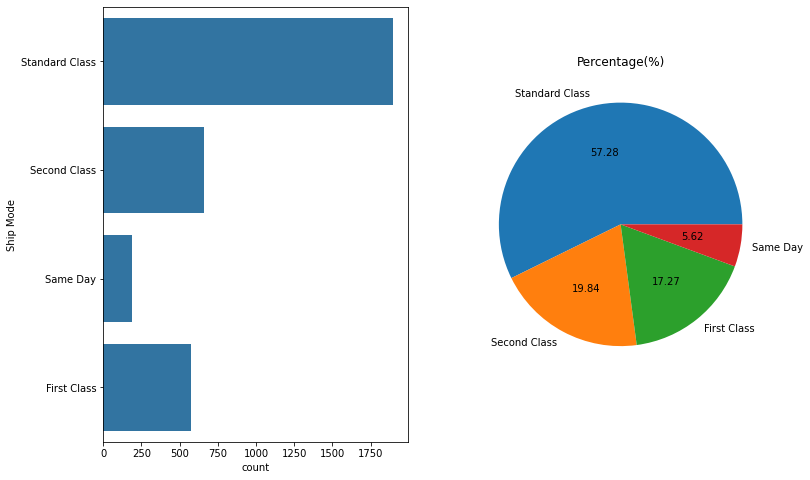

In [33]:
figure1, plot1 = plt.subplots(1,2,figsize=(12,8))

sns.countplot(df['Ship Mode'].sort_values(ascending=False),ax=plot1[0])

labels=["Standard Class","Second Class", "First Class", "Same Day"]
plt.title('Percentage(%)')
plt.pie(df["Ship Mode"].value_counts() , labels =labels, autopct='%.02f');
plt.show()

In [34]:
df_ship=df[['Ship Mode', '% Profit']].groupby('Ship Mode').mean()
df_ship=df_ship.reset_index()

fig = px.bar(df_ship, y='% Profit', x='Ship Mode', text_auto='.3s', width = 500,
             title="Percentage Profit per Ship Mode", color='Ship Mode')
fig.show()

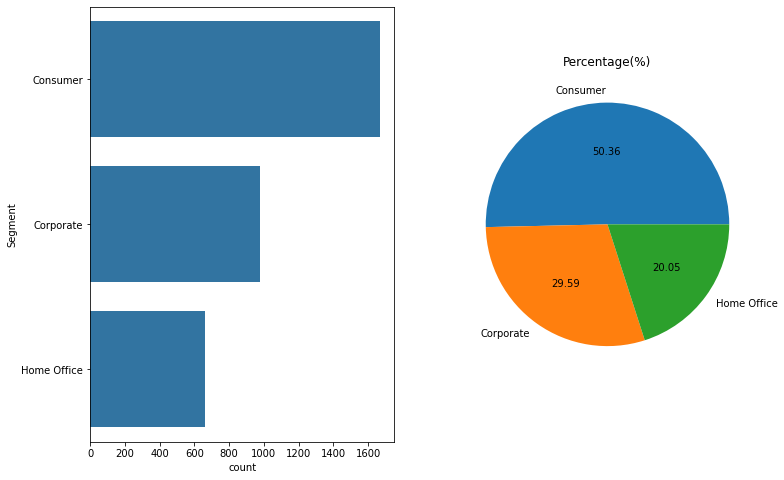

In [35]:

figure1, plot1 = plt.subplots(1,2,figsize=(12,8))

sns.countplot(df['Segment'].sort_values(ascending=True),ax=plot1[0])

labels=["Consumer","Corporate", "Home Office"]
plt.title('Percentage(%)')
plt.pie(df["Segment"].value_counts() , labels =labels, autopct='%.02f');
plt.show()

In [36]:
# % Profit per Segment

df_ship=df[['Segment', '% Profit']].groupby('Segment').mean()
df_ship=df_ship.reset_index()

fig = px.bar(df_ship, y='% Profit', x='Segment', text_auto='.3s', width = 500,
             title="Percentage Profit per Segment", color='Segment')
fig.show()

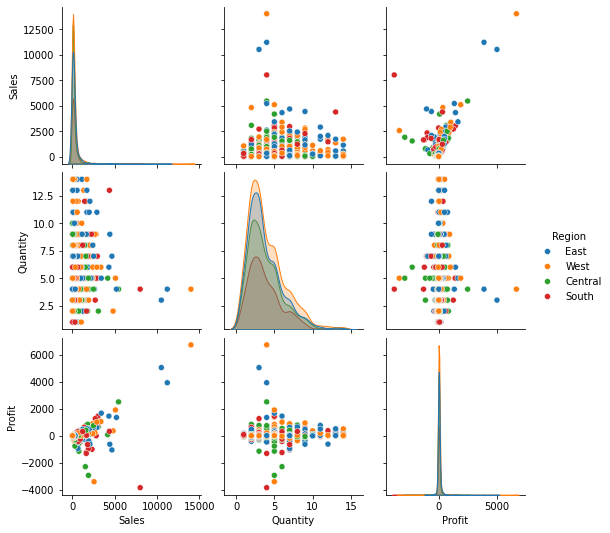

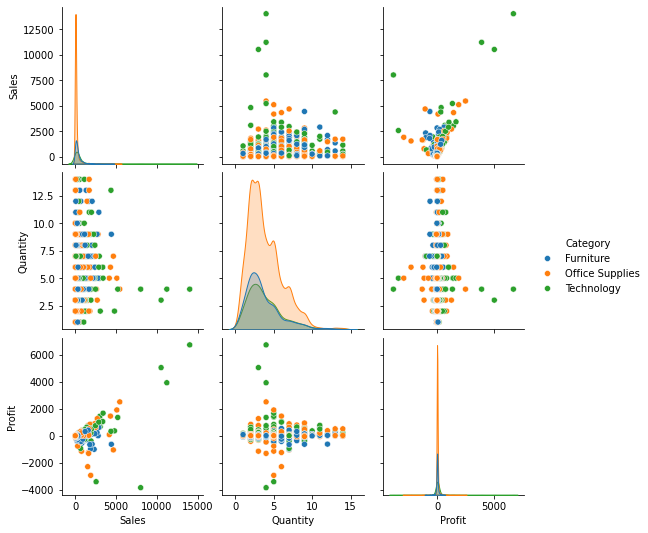

In [40]:
df_sum = df.copy()

df_sum.drop(["Row ID", "Postal Code", "Discount", '% Profit'], axis=1, inplace=True)
df_sum.groupby(['Ship Mode', 'Region','Category']).sum().round(2)
df_sum.groupby(['Segment','Region','Category']).sum().round(2)
sns.pairplot(df_sum,hue='Region')
sns.pairplot(df_sum,hue='Category')

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline
AV = AutoViz_Class()
AV.AutoViz(filename='',dfte=df,depVar='Profit',verbose=1,max_rows_analyzed=df.shape[0]
               ,max_cols_analyzed=df.shape[1])